In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Check with lecture if we can use cv2 or PIL for image checking
import os
# from PIL import Image
# import cv2
from collections import Counter


## Exploratory Data Analysis
This section aims to perform the exploratory data analysis (EDA) on the dataset. The EDA consists of two main parts, including:

### Basic information

In [23]:
# Load the data set
dataset_path = './data/data_labels_mainData.csv'
data = pd.read_csv(dataset_path)

In [24]:
print("Dataset Overview:")
print(f"Dataset shape: {data.shape}")
print("\nFirst few rows:")
print(data.head())

Dataset Overview:
Dataset shape: (9896, 6)

First few rows:
   InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0       22405          1  22405.png   fibroblast         0            0
1       22406          1  22406.png   fibroblast         0            0
2       22407          1  22407.png   fibroblast         0            0
3       22408          1  22408.png   fibroblast         0            0
4       22409          1  22409.png   fibroblast         0            0


In [25]:
# 2. Basic Data Information
print("\n--- Data Information ---")
print(data.info())


--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB
None


In [26]:
print("\n--- Missing Values ---")
print(data.isnull().sum())


--- Missing Values ---
InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64


The data_labels_mainData.csv dataset has 9896 rows and 6 columns, in which there are two ID columns including the InstanceID and patientID. The two columns **cellType** and **isCancerous** are two target variables. The cellTypeName is the text version of the **cellType** column. For the independent columns, ImageName the path to the image located under **patches_images** folder. The dataset does not have any missing value.

### Explore the categorical variables

#### isCancerous variable

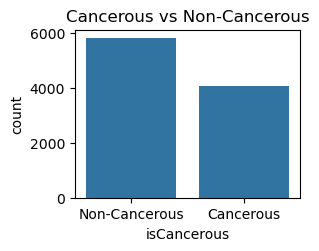

In [35]:
# 4.2 Cancerous Distribution
plt.subplot(2, 2, 2)
sns.countplot(x='isCancerous', data=data)
plt.title('Cancerous vs Non-Cancerous')
plt.xticks([0, 1], ['Non-Cancerous', 'Cancerous'])
plt.show()

#### Cell Type

In [27]:
cell_type_counts = data[['cellType', 'cellTypeName']].value_counts().reset_index()
cell_type_counts.columns = ['cellType', 'cellTypeName', 'Count']
cell_type_counts

,cellType,cellTypeName,Count
0,2,epithelial,4079
1,1,inflammatory,2543
2,0,fibroblast,1888
3,3,others,1386


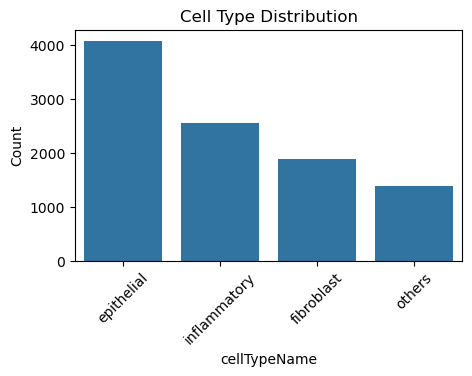

In [48]:
plt.figure(figsize=(5, 3))
sns.barplot(cell_type_counts, x="cellTypeName", y="Count")
plt.title('Cell Type Distribution')
plt.xticks(rotation=45)
plt.show()

###### For the cell type varible, the cell type is already encoded, which is shown in the following table. 
2	epithelial	4079
1	1	inflammatory	2543
2	0	fibroblast	1888
3	3	others

| Cell type name | Encoded value |
| - | - |
| fibroblast | 0 |
| inflammatory | 1 |
| epithelial | 2 |
| others | 3 |


Also, the distribution of the cell type shows that the classes are imbalanced. For example, the **epithelial** class has 4079 instances, which is nearly twice (~2.16) as many as the fibroblast class.

### Patient distribution

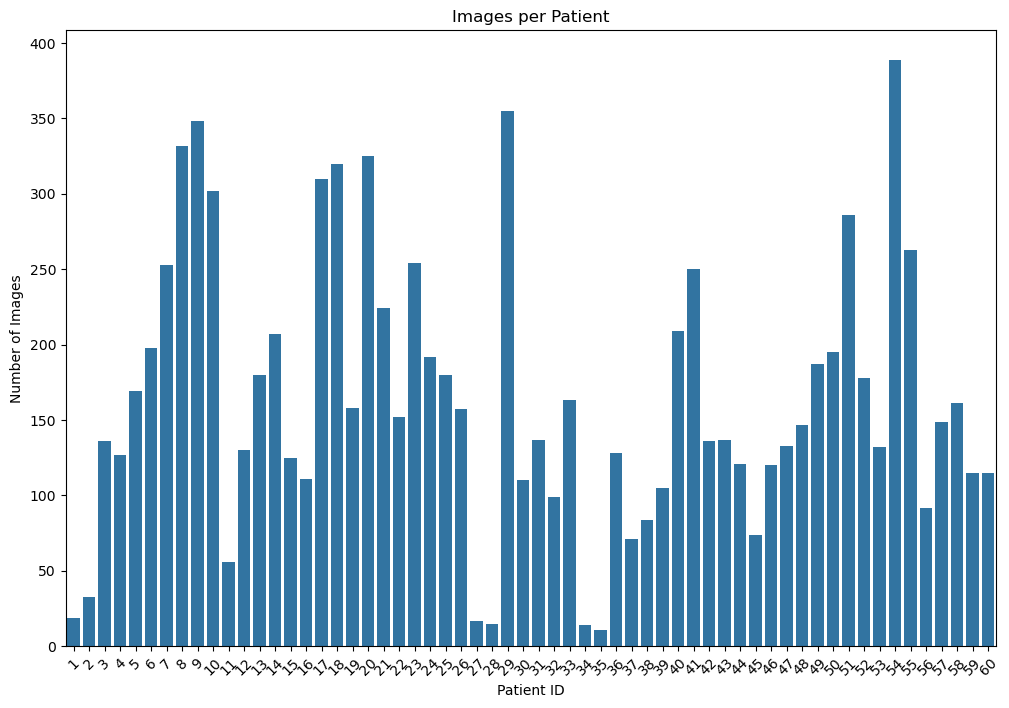

In [51]:
patient_counts = data['patientID'].value_counts()
plt.figure(figsize=(12, 8))

sns.barplot(x=patient_counts.index, y=patient_counts.values)

plt.title('Images per Patient')
plt.xlabel('Patient ID')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

### Cell type and Cancerous Status

This section aims to examine the relationsip between two categorical varibales (isCanerous and cellType) to answer the question in which cell type is detected, the patient will have cancer?

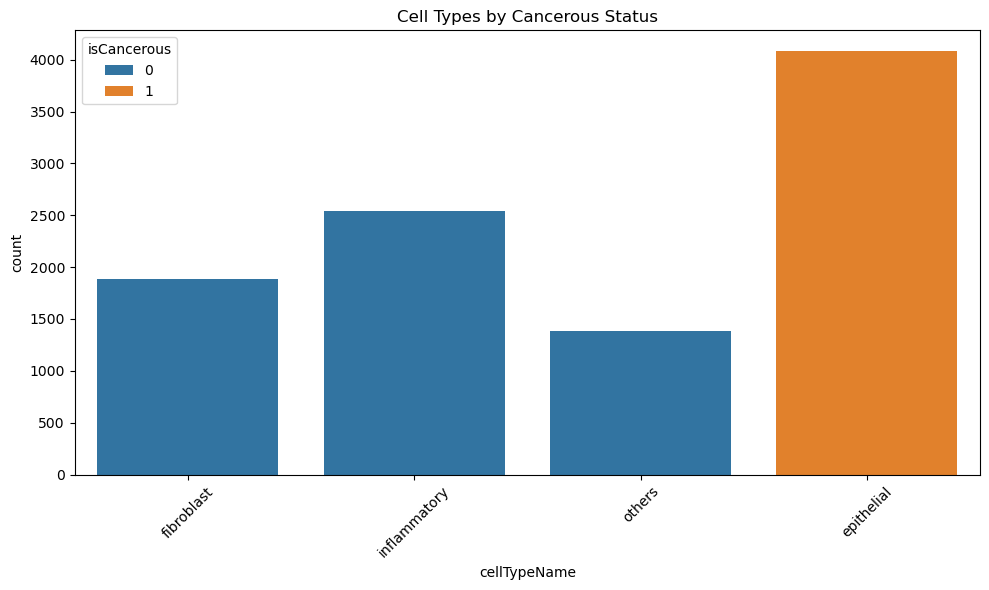

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cellTypeName', hue='isCancerous', data=data)
plt.title('Cell Types by Cancerous Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Image analysis

In [55]:
# TODO: add the code for the image analysis here. Check for the size, noise and resolution

### EDA Summary

In summary, the given dataset has **9896** and **6** columns, in which two ID columns and the 3 categorical variables, which cellTypeName and cellType columns describe the cell type and isCancerous column tell if the patient has the cancer or not. Also, there is no additional features (i.e. text, integer), which indicate that for this task, both cellType and isCanerous will be predicted via the given images in patches_images folder. 
Besides that, the given dataset provides noticable information including:

- The cancer cell type has been encoded with numeric value
- The data is **imbalanced** data